In [2]:
#importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [38]:
#opening the new csv file for our data
df = pd.read_csv('./data/Clean_AviationII.csv')

**Is there any correlation between weather and accidents?
Weather that produces most accidents**

  Compare with damage
    
    #Aircraft_damage

    
  Compare with injuries
    
	#Total_Fatal_Injuries
	#Total_Serious_Injuries
	#Total_Minor_Injuries
	#Total_Uninjured
    
    #Injury_severity

In [39]:
df.columns

Index(['Event_Id', 'Accident_Number', 'Event_Date', 'Location', 'Country',
       'Injury_Severity', 'Aircraft_Damage', 'Aircraft_Category', 'Make',
       'Model', 'Number_of_Engines', 'Engine_Type', 'Purpose_of_flight',
       'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition',
       'Phase_of_Flight', 'created_year', 'created_month', 'created_day',
       'Total_Injuries', 'Total_Passengers', 'Make_Model'],
      dtype='object')

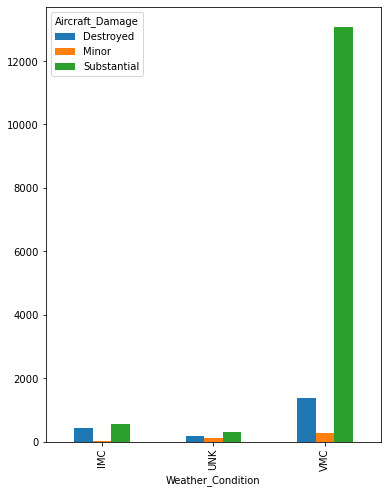

In [40]:
Weather_v_Damage = df[['Weather_Condition', 'Aircraft_Damage']]

Weather_v_Damage_count = Weather_v_Damage.value_counts()
Weather_v_Damage_count = Weather_v_Damage_count.unstack(level = 1)

Weather_v_Damage_count.drop(columns=['Unknown']).plot(kind='bar', figsize=(6,8),use_index = True)

new_col = df['Weather_Condition'].value_counts().values
Weather_v_Injuries = df.groupby('Weather_Condition')[['Total_Injuries', 'Total_Uninjured']].sum()
Weather_v_Injuries['Number_of_Accidents'] = new_col
Weather_v_Injuries['Injuries_per_Accident'] = Weather_v_Injuries['Total_Injuries'] / Weather_v_Injuries['Number_of_Accidents']
Weather_v_Injuries['Uninjuried_per_Accident'] = Weather_v_Injuries['Total_Uninjured'] / Weather_v_Injuries['Number_of_Accidents']

Weather_Injuries = Weather_v_Injuries[['Total_Injuries', 'Total_Uninjured']]
Weather_rate = Weather_v_Injuries[['Injuries_per_Accident','Uninjuried_per_Accident']].reset_index()

<AxesSubplot:xlabel='Weather_Condition'>

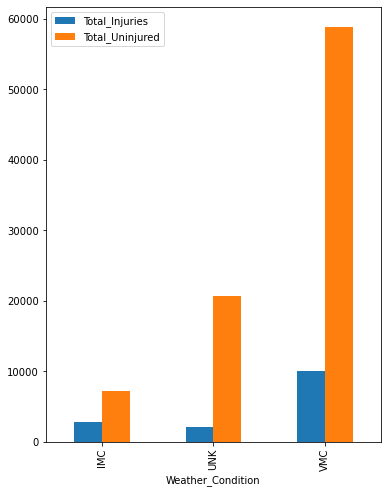

In [41]:
Weather_Injuries.plot(kind='bar', figsize=(6,8),use_index = True)

**Is there a correlation between engine type and accidents? Do accidents decrease with a certain engine type?**
	
    -Engine Type

	#Amateur_Built     - maybe drop ? filtering commercial, private,          
	#Number_of_Engines          
	#Engine_Type  


<AxesSubplot:xlabel='Engine_Type'>

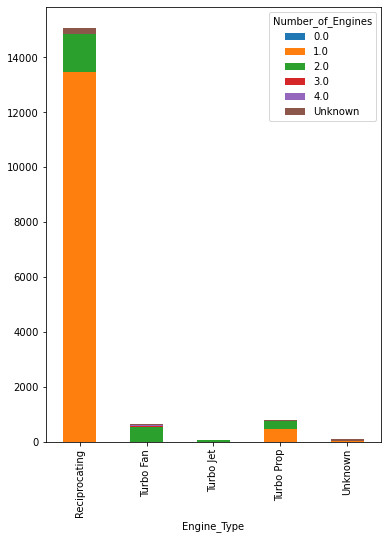

In [52]:
Engines = df.groupby(['Number_of_Engines', 'Engine_Type']).size().unstack(level = 0, fill_value = 0)
Engines.plot(kind='bar', stacked=True, figsize=(6,8), use_index = True)

In [53]:
top_makes = df['Make'].value_counts()[:20]

make_df = df[df['Make'].isin(top_makes.index)][['Make', 'Total_Injuries', 'Total_Passengers']]

make_df = df.groupby(['Make','Engine_Type'])[ 'Total_Injuries', 'Total_Passengers'].sum().nlargest(20, columns=['Total_Injuries', 'Total_Passengers'])

make_df['Injury Rate'] = 1 - (make_df['Total_Injuries']/ make_df['Total_Passengers'])
make_df = make_df.drop(columns= ['Total_Injuries', 'Total_Passengers'])
make_df = make_df.unstack(fill_value=0)
make_df

<ipython-input-53-3088d2c70009>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  make_df = df.groupby(['Make','Engine_Type'])[ 'Total_Injuries', 'Total_Passengers'].sum().nlargest(20, columns=['Total_Injuries', 'Total_Passengers'])


Injury Rate                               
Engine_Type        Reciprocating Turbo Fan   Unknown Turbo Prop
Make                                                           
Cessna                  0.662786  0.000000  0.000000   0.626466
Piper                   0.626925  0.000000  0.000000   0.524229
Boeing                  0.000000  0.967179  0.632210   0.000000
Beech                   0.550758  0.000000  0.000000   0.702128
Airbus                  0.000000  0.956627  0.000000   0.000000
Mooney                  0.495652  0.000000  0.000000   0.000000
Douglas                 0.000000  0.978769  0.847849   0.000000
Embraer                 0.000000  0.932831  0.000000   0.000000
Cirrus design corp      0.481081  0.000000  0.000000   0.000000
Bellanca                0.640199  0.000000  0.000000   0.000000
Grumman                 0.542208  0.000000  0.000000   0.000000
Aeronca                 0.610224  0.000000  0.000000   0.000000
Air tractor             0.000000  0.000000  0.000000   0.594684
Cirrus                  0.515000  0.000000  0.000000   0.000000
Champion                0.635628  0.000000  0.000000   0.000000

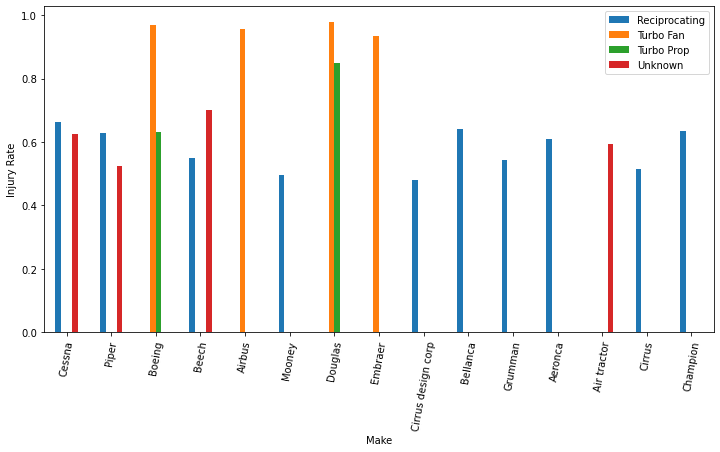

In [56]:
fig, ax = plt.subplots()

make_df.plot(kind='bar', rot=80, figsize=(12,6), ax =ax)
ax.legend(['Reciprocating',
'Turbo Fan',
'Turbo Prop',
'Unknown'])
ax.set_ylabel('Injury Rate');

In [57]:
df[['Make_Model','Engine_Type']].value_counts()[:20]

Make_Model               Engine_Type  
Cessna 172               Reciprocating    744
Cessna 152               Reciprocating    416
Cessna 172N              Reciprocating    301
Cessna 182               Reciprocating    286
Cessna 172S              Reciprocating    258
Cessna 180               Reciprocating    227
Piper PA28               Reciprocating    224
Cessna 150               Reciprocating    219
Piper PA-28-140          Reciprocating    201
Cessna 172M              Reciprocating    199
Piper PA-18-150          Reciprocating    188
Cessna 172P              Reciprocating    158
Beech A36                Reciprocating    149
Piper PA-28-161          Reciprocating    132
Piper PA-28-180          Reciprocating    121
Cessna 140               Reciprocating    120
Cirrus design corp SR22  Reciprocating    120
Cessna 170B              Reciprocating    116
Piper PA-28-181          Reciprocating    106
Piper PA-18              Reciprocating    104
dtype: int64

Most of the top crashes are related with a planes with reciprocating engine. Only the model Bell 206B has a turbo shaft engine

In [58]:
top_models = df[['Make_Model']].value_counts()[:20]

model_df = df[df['Make_Model'].isin(top_models.index)][['Make_Model', 'Total_Injuries', 'Total_Passengers']]
model_df

,Make_Model,Total_Injuries,Total_Passengers


In [49]:
model_df = make_df = df.groupby(['Make_Model'])[ 'Total_Injuries', 'Total_Passengers'].sum().nlargest(20, 
    columns=['Total_Injuries', 'Total_Passengers'])
model_df

<ipython-input-49-213644b54739>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  model_df = make_df = df.groupby(['Make_Model'])[ 'Total_Injuries', 'Total_Passengers'].sum().nlargest(20,


,Total_Injuries,Total_Passengers
Make_Model,,
Cessna 172,400.0,1322.0
Boeing 747-2B6B,380.0,380.0
Boeing 747-300,254.0,254.0
Boeing 767,229.0,2751.0
Cessna 182,228.0,587.0
Boeing 737,220.0,3402.0
Cessna 172N,211.0,567.0
Douglas MD-11,200.0,792.0
Beech A36,197.0,348.0


In [59]:
model_df['Injury_Rate'] = 1 - (model_df['Total_Injuries']/ model_df['Total_Passengers'])
model_df = model_df.drop(columns= ['Total_Injuries', 'Total_Passengers'])
model_df

,Make_Model,Injury_Rate


<ipython-input-21-696659c4ee36>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(model_df.index, rotation=80)


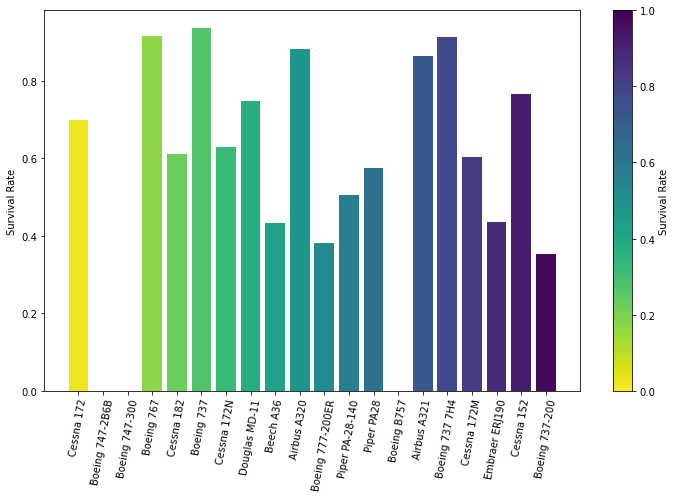

In [21]:
fig, ax = plt.subplots(figsize=(12,7))

color_map = plt.cm.viridis_r
bin_edges = np.linspace(0,1, len(model_df) + 1)
colors = [color_map((bin_edges[i] + bin_edges[i+1])/2) for i in range(len(model_df))]

# model_df.plot(kind='bar', rot=80, figsize=(12,6), ax =ax,legend=False, color =colors)
# ax.set_ylabel('Survival Rate');

for index, (make, row) in enumerate(model_df.iterrows()):
    color = colors[index]
    ax.bar(make, row['Survival_Rate'], color = color)

ax.set_xticklabels(model_df.index, rotation=80)
ax.set_ylabel('Survival Rate')
sm = plt.cm.ScalarMappable(cmap = color_map, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Survival Rate')

In [51]:
df[['Total_Fatal_Injuries', 'Total_Injuries','Total_Passengers']].loc[(df['Make_Model'] == 'Boeing 747-300')]

,Total_Fatal_Injuries,Total_Injuries,Total_Passengers
2867,228.0,254.0,254.0
